In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

In [2]:
mpg_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Seaborn/mpg.csv')

In [3]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# Seaborn introduction

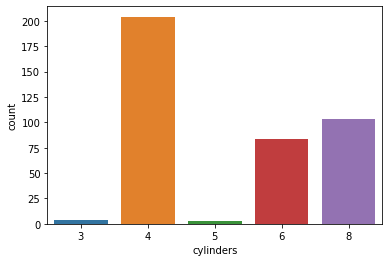

In [5]:
sns.countplot(x='cylinders', data=mpg_data)
plt.show()

## Adding a third variable with hue

In [6]:
# introduce tips dataset from seaborn module 
tips = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Seaborn/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Exploring relationship between total bill and tip 

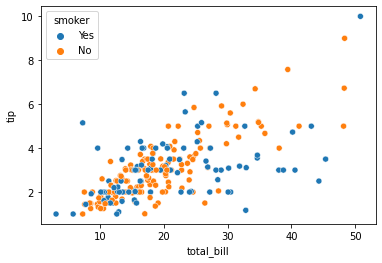

In [7]:
sns.scatterplot(
    x='total_bill',
    y='tip',
    data=tips,
    hue='smoker',
    hue_order=['Yes','No']
) # showing a third variable as the hue
plt.show()

## Matplotlib.pyplot review

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


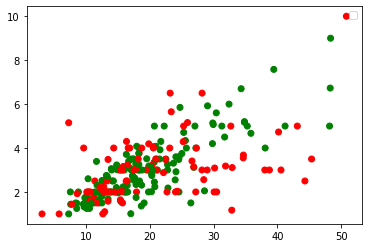

In [8]:
def plotcolors(list):
    cols = []
    for i in list:
        if i == 'Yes':
            cols.append('Red')
        elif i == 'No':
            cols.append('Green')
    return cols

colors = plotcolors(tips['smoker'])

fig, ax = plt.subplots()

ax.scatter(tips['total_bill'], tips['tip'], c=colors)
ax.legend()
plt.show()

In [9]:
non_smoker = tips.query('smoker == "No"')
non_smoker.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
smoker = tips.query('smoker == "Yes"')

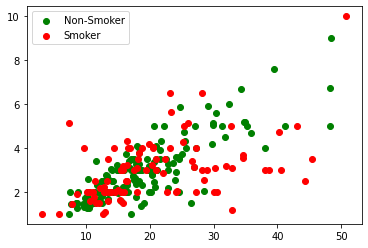

In [11]:
fig, ax = plt.subplots()

ax.scatter(non_smoker['total_bill'], non_smoker['tip'], label='Non-Smoker', color='g')
ax.scatter(smoker['total_bill'], smoker['tip'], label='Smoker', color='red')


plt.legend()

plt.show()

## Specify the hue colors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


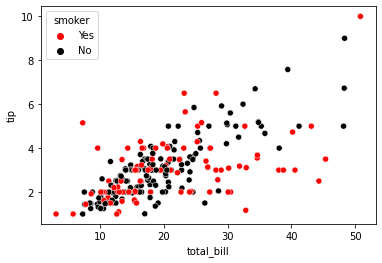

In [12]:
hue_colors = {'Yes':'Red', 'No':'Black'}

sns.scatterplot(
    'total_bill',
    'tip',
    data=tips,
    hue='smoker',
    palette = hue_colors,
    hue_order = ['Yes','No']
)

plt.show()

## HTML hue colors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


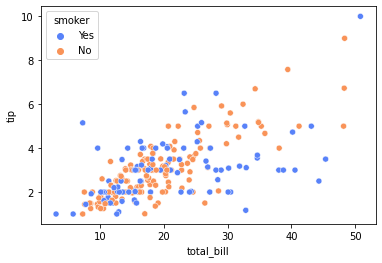

In [13]:
hue_colors = {'Yes':'#5882F9', 'No':'#F99358'}

sns.scatterplot(
    'total_bill',
    'tip',
    data=tips,
    hue='smoker',
    palette = hue_colors,
    hue_order = ['Yes','No']
)

plt.show()

## Using hue to plot number of smokers categorized by sex

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


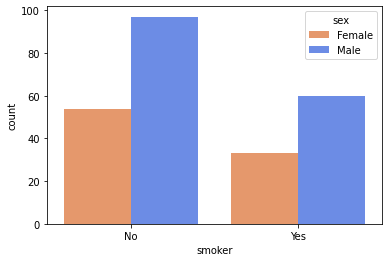

In [14]:
hue_colors = {'Male':'#5882F9', 'Female':'#F99358'}

sns.countplot(
    'smoker',
    data=tips,
    hue='sex',
    palette = hue_colors
)

plt.show()

# Intro to relational plots and subplots 

 relplot() lets you create subplots in a single figure; allowing you to compare two or more quantitative variables

## creating subplots in column dimension

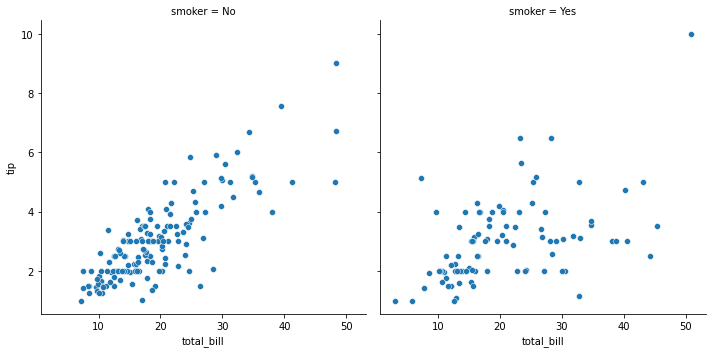

In [15]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='smoker')
plt.show()

## creating subplots in row dimension

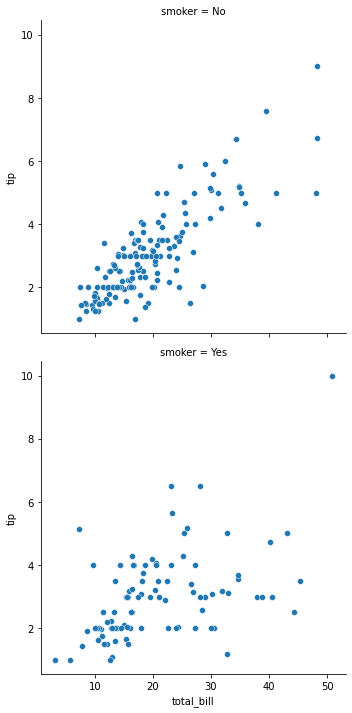

In [16]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', row='smoker')
plt.show()

## Matplotlib.pyplot review

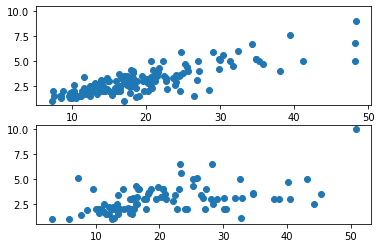

In [17]:
fig, ax = plt.subplots(2,1, sharey=True)

ax[0].scatter(non_smoker['total_bill'], non_smoker['tip'])
ax[1].scatter(smoker['total_bill'], smoker['tip'])

plt.show()

## creating subplots using both row x column

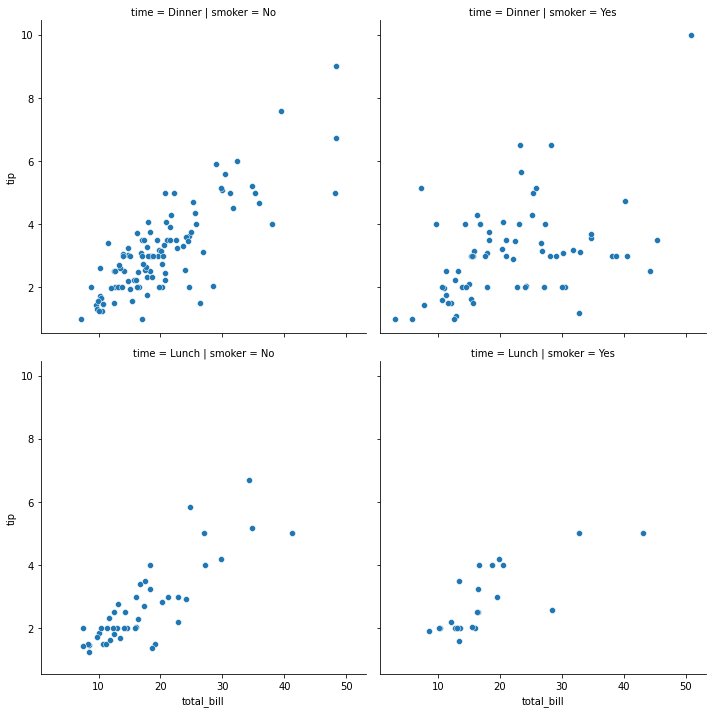

In [18]:
sns.relplot(
    x='total_bill',
    y='tip', data=tips,
    kind='scatter',
    col='smoker',
    row ='time'
)
plt.show()

## wrapping columns

In [19]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

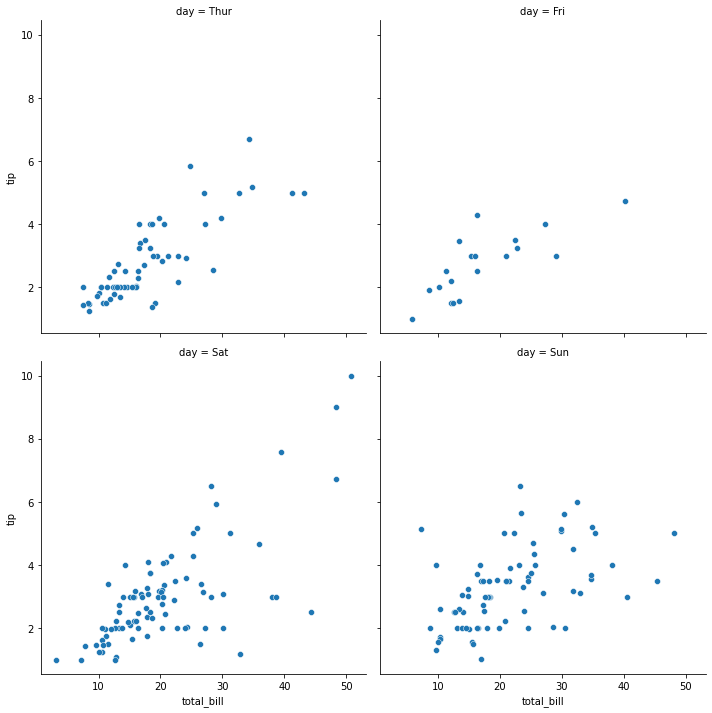

In [20]:
sns.relplot(
    x='total_bill',
    y='tip', data=tips, 
    kind='scatter',
    col='day',
    col_wrap = 2, # this determines how many plots in a row 
    col_order = ['Thur','Fri','Sat','Sun'] # This determines plot order based off the col argument values
)
plt.show()

# Customizing scatter plots

## subgroups with point size

varying point size is best used if the variable is either quantitative or categorical variable that represents different levels of something

make size easier to read by using it with hue = to the same size variable

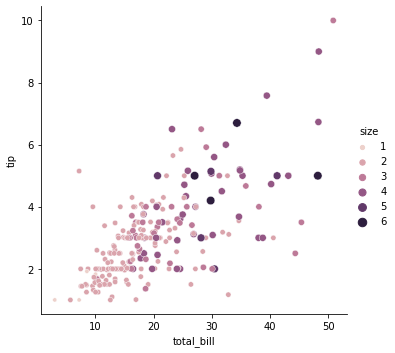

In [23]:
sns.relplot(
    x='total_bill',
    y='tip',    
    data=tips,
    kind='scatter',
    size='size',
    hue = 'size'
)
plt.show()

## subgroups with point style 

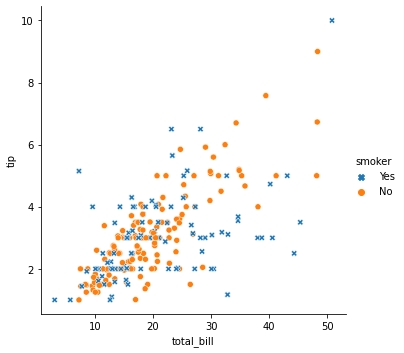

In [35]:
sns.relplot(
    x='total_bill',
    y='tip',
    data=tips,
    kind = 'scatter',
    hue='smoker',
    style= 'smoker', # notice how style and hue have the same variable 
    hue_order=['Yes','No']
) # showing a third variable as the hue
plt.show()

## changing point transparency

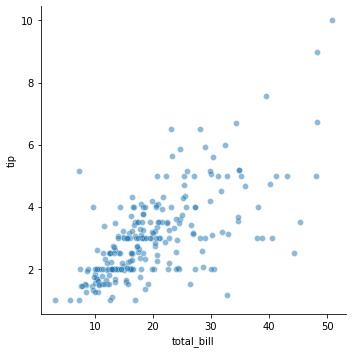

In [34]:
sns.relplot(
    x='total_bill',
    y='tip',
    kind='scatter',
    data=tips,
    hue_order=['Yes','No'],
    alpha = 0.5 # use this to see data dense areas on a scatter plot
) 
plt.show()

## Create a scatter plot of horsepower vs mpg

In [30]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


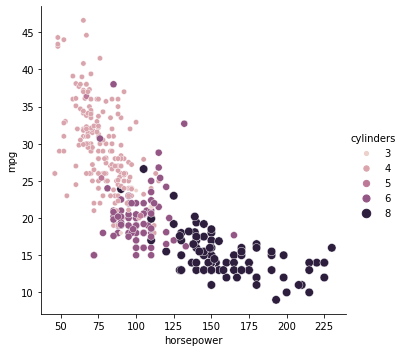

In [33]:
sns.relplot(
    x='horsepower',
    y='mpg',
    data = mpg_data,
    kind='scatter',
    size = 'cylinders',
    hue='cylinders'
)
plt.show()

## create a scatter plot of acceleration vs mpg

data shows us cars from the US tend to accelerate quicker and have lower mpg than cars from Japan and Europe 

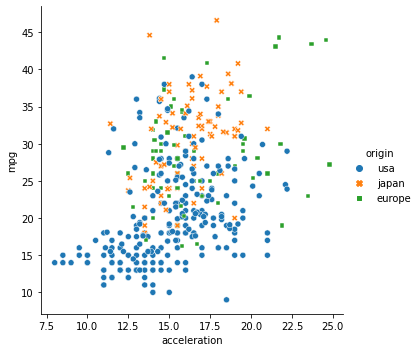

In [36]:
sns.relplot(
    x='acceleration',
    y='mpg',
    data = mpg_data,
    kind = 'scatter',
    hue = 'origin',
    style= 'origin'
)
plt.show()

# Introduction of Line Plots

used to show the same variable over a period of time 

In [37]:
# Introducing climate change data for exploration using Seaborn line plot 
climate_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Matplotlib/climate_change.csv')
climate_data.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


In [41]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           706 non-null    object 
 1   co2            699 non-null    float64
 2   relative_temp  706 non-null    float64
dtypes: float64(2), object(1)
memory usage: 16.7+ KB


In [43]:
climate_data['date']= pd.to_datetime(climate_data['date'])

In [47]:
# adding a year column to visually see the years on the graph 
climate_data['year'] = pd.DatetimeIndex(climate_data['date']).year

In [48]:
climate_data.head()

,date,co2,relative_temp,year
0,1958-03-06,315.71,0.10,1958
1,1958-04-06,317.45,0.01,1958
2,1958-05-06,317.50,0.08,1958
3,1958-06-06,NaN,-0.05,1958
4,1958-07-06,315.86,0.06,1958


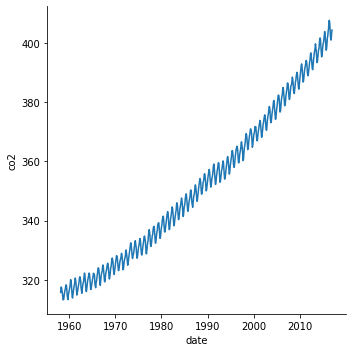

In [45]:
sns.relplot(
    x='date',
    y='co2',
    data = climate_data,
    kind =  'line'
)

plt.show()

## multiple line plots on one graph based off categorical value

In [49]:
# introduce seattle_weather data
seattle_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Matplotlib/seattle_weather.csv')
seattle_data.head()

,STATION,NAME,DATE,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USC00456295,"PALMER 3 ESE, WA US",1,13.0,1.0,-7777.0,0.0,0.0,0.0,0.0,...,310.0,310.0,34.0,168.0,327.0,615.0,877.0,987.0,1000.0,2.8
1,USC00456295,"PALMER 3 ESE, WA US",2,23.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,...,280.0,280.0,33.9,132.0,275.0,515.0,800.0,963.0,1000.0,3.1
2,USC00456295,"PALMER 3 ESE, WA US",3,50.0,11.0,1.0,-7777.0,-7777.0,0.0,0.0,...,310.0,310.0,35.9,5.0,47.0,111.0,393.0,848.0,1000.0,2.1
3,USC00456295,"PALMER 3 ESE, WA US",4,108.0,40.0,12.0,7.0,3.0,-7777.0,0.0,...,300.0,300.0,38.3,0.0,0.0,5.0,123.0,571.0,978.0,2.0
4,USC00456295,"PALMER 3 ESE, WA US",5,255.0,130.0,56.0,38.0,19.0,1.0,-7777.0,...,310.0,310.0,43.5,0.0,0.0,0.0,0.0,83.0,610.0,2.0


In [50]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATION                  204 non-null    object 
 1   NAME                     204 non-null    object 
 2   DATE                     204 non-null    int64  
 3   MLY-CLDD-BASE45          180 non-null    float64
 4   MLY-CLDD-BASE50          180 non-null    float64
 5   MLY-CLDD-BASE55          180 non-null    float64
 6   MLY-CLDD-BASE57          180 non-null    float64
 7   MLY-CLDD-BASE60          180 non-null    float64
 8   MLY-CLDD-BASE70          180 non-null    float64
 9   MLY-CLDD-BASE72          180 non-null    float64
 10  MLY-CLDD-NORMAL          180 non-null    float64
 11  MLY-DUTR-NORMAL          180 non-null    float64
 12  MLY-DUTR-STDDEV          180 non-null    float64
 13  MLY-GRDD-BASE40          180 non-null    float64
 14  MLY-GRDD-BASE45          1

## plotting DATE vs MLY-TAVG-NORMAL 

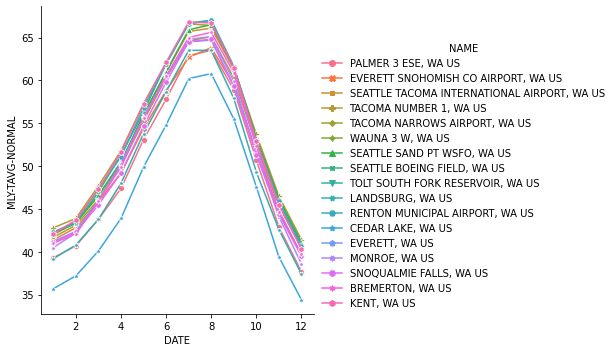

In [61]:
sns.relplot(
    x='DATE',
    y = 'MLY-TAVG-NORMAL',
    data = seattle_data,
    kind = 'line',
    style = 'NAME',
    hue = 'NAME',
    markers=True, # adding markers to show timeseries data was not continous but rather spot checks for CO2
    dashes=False # used to remove dashed lines 
)

plt.show()

adding markers to line plot to show timeseries data was not continuously taken

In [ ]:
austin_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Matplotlib/austin_weather.csv')

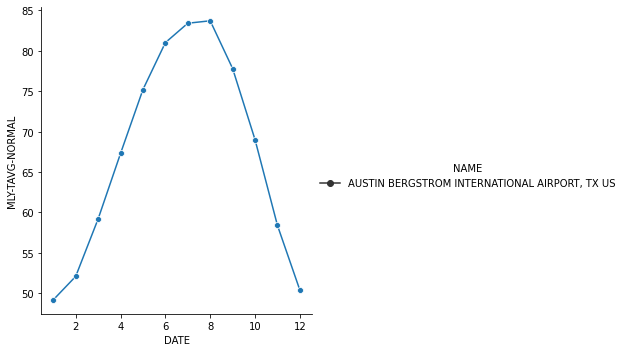

In [59]:
sns.relplot(
    x='DATE',
    y = 'MLY-TAVG-NORMAL',
    data = austin_data,
    kind = 'line',
    style = 'NAME',
    markers=True # adding markers to show timeseries data was not continous but rather spot checks for CO2
)

plt.show()

In [62]:
random_co2 = pd.read_csv('/Users/joseservin/DataCamp/Courses/Intro_Seaborn/random_co2.csv')
random_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hour        25 non-null     int64 
 1   co2         25 non-null     int64 
 2   station_id  25 non-null     int64 
 3   region      25 non-null     object
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes


## multiple observations per x-value

* when a line plot is given multiple observations per x value, it will aggregate them into a single summary measure (default = mean)
* shadded region of the graph represents the confidence interval of the mean
* assumes dataset is a random sample representing the population; so we can be 95% confident the mean is within this interval shown

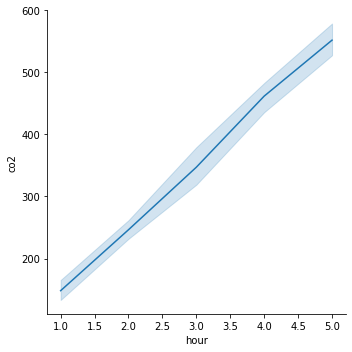

In [65]:
sns.relplot(
    x='hour',
    y='co2',
    data = random_co2,
    kind='line'
)

plt.show()

## replacing confidence interval with standard deviation 

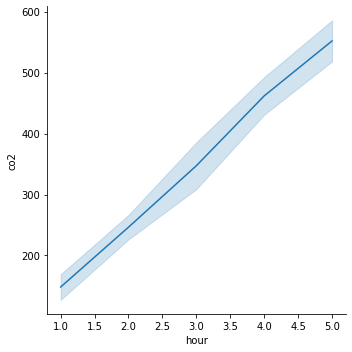

In [68]:
sns.relplot(
    x='hour',
    y='co2',
    data = random_co2,
    kind='line',
    ci='sd' # the shaded reagions of the graph now represent the standard deviation
)

plt.show()

## turning off confidence interval 

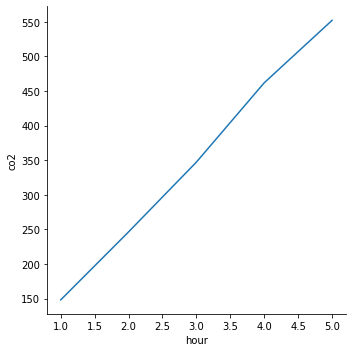

In [71]:
sns.relplot(
    x='hour',
    y='co2',
    data = random_co2,
    kind='line',
    ci=None # confidence interval is now turned off (remember line represents mean co2 of observations per hour)
)

plt.show()